In [2]:

import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('/content/startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df.drop(columns=['Remarks'],axis=1,inplace=True)

In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [8]:
df.set_index('Sr No',inplace=True)

In [9]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'

},inplace=True)

In [10]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [11]:
df['amount'] = df['amount'].fillna('0')

In [12]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [13]:
df = df[df['amount'].str.isdigit()]

In [14]:
df['amount'] = df['amount'].astype('float')

<ipython-input-14-7f7281082de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'] = df['amount'].astype('float')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [16]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [17]:
def to_inr(dollar):
    inr = dollar * 85.58
    return inr/10000000

In [18]:
df['amount'] = df['amount'].apply(to_inr)

In [19]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.600000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.878156
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.115124
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.674000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.404400


In [20]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [21]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [22]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.600000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,68.878156
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.115124
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.674000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.404400


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1284 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [24]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 1 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1203 non-null   datetime64[ns]
 1   startup      1203 non-null   object        
 2   vertical     1203 non-null   object        
 3   subvertical  891 non-null    object        
 4   city         1203 non-null   object        
 5   investors    1203 non-null   object        
 6   round        1203 non-null   object        
 7   amount       1203 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 84.6+ KB


In [26]:
df.to_csv('startup_cleaned.csv',index=False)

In [27]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.600000
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.115124
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.674000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.404400
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1283.700000


In [28]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91springboard',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhinav Patodia',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Accel India',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accion',
 ' Adam D\\\\xe2\\\\x80\\\\x99Angelo',
 ' Aditya Agarwal',
 ' Aditya Aggarwal',
 ' Aditya Malik & Others',
 ' Aditya Vazirani',
 ' AdvantEdge Partners',
 ' Adveq Management',
 ' Aijaz Saleem',
 ' Ajay Bhatia',
 ' Ajeet Khurana & others',
 ' Akatsuki and Incubate Fund from Japan and Better Capital AngelList syndicate.',
 ' Alfa Capital',
 ' Alok Divatia',
 ' Alok Mittal',
 ' Alok Sharma',
 ' Aloke Bajp

In [29]:
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,188.276
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,8.558
1506,2016-04-07,Curefit,Consumer Internet,Bangalore,Private Equity,128.370
1673,2016-04-05,Lenskart,eCommerce,New Delhi,Private Equity,513.480
1933,2016-08-02,Xpressbees,ECommerce,Pune,Private Equity,106.975


In [30]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

,amount
startup,
Lenskart,513.480
Bizongo,188.276
Curefit,128.370
Xpressbees,106.975
FirstCry.com,85.580
Cloudcherry Analytics,8.558
Little Black Book,8.558
Tripoto,0.000


<Axes: ylabel='amount'>

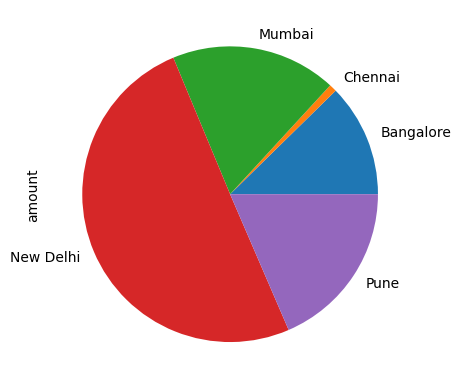

In [31]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [32]:
df['year'] = df['date'].dt.year

In [33]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.600000,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.115124,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.674000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.404400,2020
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1283.700000,2020


<Axes: xlabel='year'>

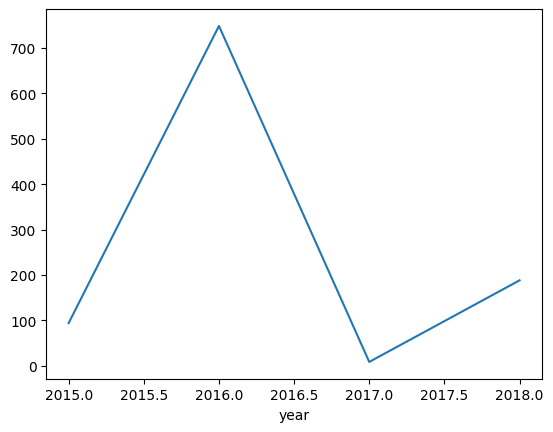

In [34]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

In [35]:
round(df['amount'].max())

21395

In [36]:
df[df['amount'] == 32175]

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,


In [37]:
df['startup'].nunique()

1082

In [38]:
df['month'] = df['date'].dt.month

In [39]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1711.600000,2020,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,157.115124,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.674000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.404400,2020,2
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1283.700000,2020,10
...,...,...,...,...,...,...,...,...,...,...
2825,2015-09-04,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,427.900000,2015,9
2826,2015-09-04,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,0.000000,2015,9
2827,2015-10-04,Whatfix,Interactive\\xc2\\xa0 How-To Guides,NaN,Bangalore,"Helion Venture Partner, Powerhouse Ventures, G...",Seed Funding,7.702200,2015,10


In [40]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,21
4,2015,5,22
...,...,...,...
57,2019,11,5
58,2019,12,5
59,2020,2,2
60,2020,9,2


In [41]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [42]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [43]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5471.557300,1-2015
1,1625.686238,2-2015
2,1981.990010,3-2015
3,2008.947710,4-2015
4,848.397330,5-2015
...,...,...
57,1196.408400,11-2019
58,1279.421000,12-2019
59,41.078400,2-2020
60,1868.715124,9-2020


In [44]:
top_sectors = df.groupby('vertical').agg(count=('startup', 'count'), sum=('amount', 'sum')).assign(combined_score=lambda x: x['count'] + x['sum']).sort_values(by=['combined_score'], ascending=False).head(5)

In [45]:
import matplotlib.pyplot as plt

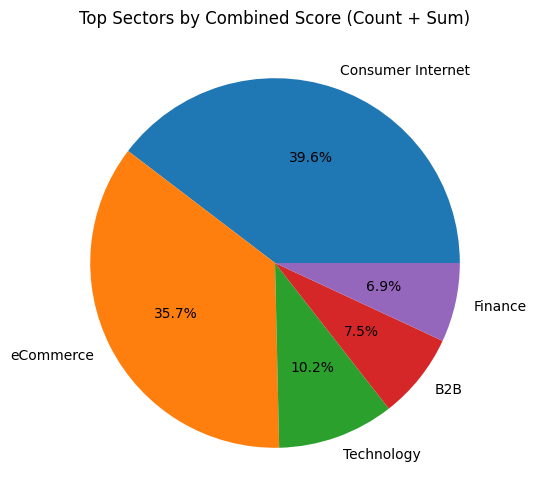

In [46]:
plt.figure(figsize=(8, 6))
plt.pie(top_sectors['combined_score'], labels=top_sectors.index, autopct='%1.1f%%')
plt.title('Top Sectors by Combined Score (Count + Sum)')
plt.show()

In [47]:
funding_types = df['round'].unique()
funding_types

array(['Private Equity Round', 'Series B', 'Pre-series A', 'Seed Round',
       'Series A', 'Series D', 'Seed', 'Seed Funding', 'Maiden Round',
       'pre-series A', 'Series C', 'Single Venture', 'Corporate Round',
       'Pre-Series A', 'Angel', 'Series J', 'Angel Round', 'Debt Funding',
       'pre-Series A', 'Venture - Series Unknown', 'Bridge Round',
       'Private Equity', 'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Pre Series A', 'Debt-Funding', 'Equity',
       'Series E', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private'], dtype=object)

In [48]:
city_funding = df.groupby('city')['amount'].sum().sort_values(ascending=False)

In [49]:
city_funding.head(10)

,amount
city,
Bangalore,40688.715749
Bengaluru,21494.261289
Mumbai,15577.355597
Gurgaon,13339.684083
New Delhi,11995.996782
Menlo Park,3851.100000
Chennai,2769.488612
Pune,2618.285868
Gurugram,2565.209914


In [50]:
# Group by year and startup, summing funding amounts
yearly_startup_funding = df.groupby(['year', 'startup'])['amount'].sum().reset_index()

# Get top startups for each year based on total funding
top_startups_by_year = yearly_startup_funding.loc[yearly_startup_funding.groupby('year')['amount'].idxmax()]

In [51]:
top_startups_by_year

,year,startup,amount
219,2015,Snapdeal,4279.00
489,2016,MakeMyTrip,1540.44
775,2017,Flipkart,21395.00
991,2018,BigBasket,2567.40
1158,2019,Udaan,5006.43
1168,2020,BYJU’S,1711.60


<ipython-input-52-03bc168652c8>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  startup_colors = {startup: plt.cm.get_cmap('tab20')(i) for i, startup in enumerate(startups)}


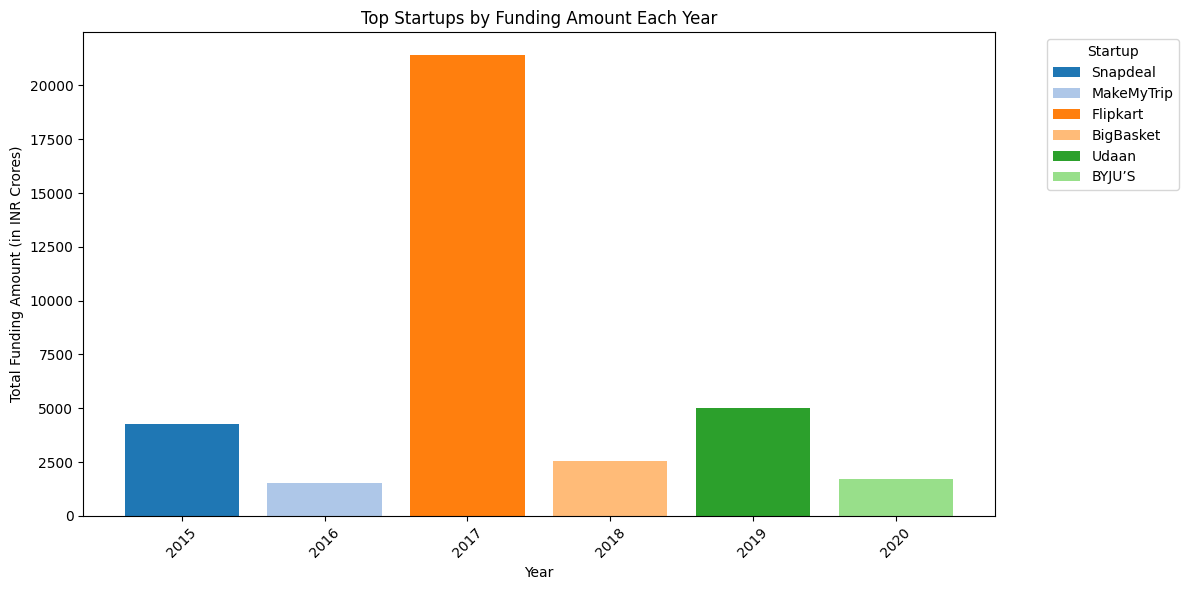

In [52]:
import matplotlib.pyplot as plt

yearly_startup_funding = df.groupby(['year', 'startup'])['amount'].sum().reset_index()
top_startups_by_year = yearly_startup_funding.loc[yearly_startup_funding.groupby('year')['amount'].idxmax()]

plt.figure(figsize=(12, 6))

years = top_startups_by_year['year'].unique()
startups = top_startups_by_year['startup'].unique()

startup_colors = {startup: plt.cm.get_cmap('tab20')(i) for i, startup in enumerate(startups)}

for index, row in top_startups_by_year.iterrows():
    plt.bar(row['year'], row['amount'], color=startup_colors[row['startup']], label=row['startup'] if row['startup'] not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title('Top Startups by Funding Amount Each Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in INR Crores)')
plt.xticks(years, rotation=45)  # Set x-axis ticks and labels
plt.legend(title='Startup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False)

,amount
startup,
Flipkart,21822.90
Udaan,6931.98
Snapdeal,4279.00
GOQii,3851.10
Zomato,3722.73
...,...
Seenit,0.00
ScoutMyTrip,0.00
Scandid,0.00


In [54]:

investor_data = df['investors'].str.split(',').explode().reset_index(drop=True)


In [55]:

investor_data = investor_data.str.strip().replace('', pd.NA).dropna()


In [56]:

top_investors = investor_data.value_counts().reset_index()
top_investors.columns = ['Investor', 'Count']
top_investors.head(10)

,Investor,Count
0,Accel Partners,33
1,Sequoia Capital,31
2,Blume Ventures,18
3,SAIF Partners,18
4,Indian Angel Network,16
5,Undisclosed investors,16
6,Ratan Tata,15
7,Undisclosed Investors,15
8,Kalaari Capital,15
9,Tiger Global Management,14


In [57]:
import seaborn as sns

In [58]:
heatmap_data = df.groupby(['year', 'vertical'])['amount'].sum().reset_index()

heatmap_data = heatmap_data.pivot(index='vertical', columns='year', values='amount')
heatmap_data

year,2015,2016,2017,2018,2019,2020
vertical,,,,,,
360-degree view creating platform,0.0000,NaN,NaN,NaN,NaN,NaN
AI,NaN,NaN,NaN,NaN,0.000,NaN
Accounting,NaN,NaN,NaN,NaN,42.790,NaN
Advertising & Marketing Community Networking platform,8.5580,NaN,NaN,NaN,NaN,NaN
"Advertising, Marketing",NaN,NaN,NaN,NaN,51.348,NaN
...,...,...,...,...,...,...
multi-sport program for preschoolers,0.0000,NaN,NaN,NaN,NaN,NaN
on-demand healthcare marketplace,2.5674,NaN,NaN,NaN,NaN,NaN
on-demand home beauty and wellness portal,0.0000,NaN,NaN,NaN,NaN,NaN


In [66]:
startup_name = "Ola"

filtered_df = df[df['startup'] == startup_name]
vertical = filtered_df['vertical'].iloc[0]
vertical

'Consumer Internet'

In [67]:
startup_name = "Ola"

filtered_df = df[df['startup'] == startup_name]
subvertical = filtered_df['subvertical'].iloc[0]
subvertical

'Cab Aggregation App'

In [74]:
# location
startup_name = "Ola"

location = df.loc[df['startup'] == startup_name, 'city'].iloc[0]
location

'Bangalore'

In [80]:
startup_name = "Ola"
startup_data = df[df['startup'] == startup_name]

funding_rounds = startup_data['round'].tolist()
stages = funding_rounds
investors = startup_data['investors'].tolist()
dates = startup_data['date'].dt.strftime('%Y-%m-%d').tolist()

for i in range(len(funding_rounds)):
print(f"Funding Round: {funding_rounds[i]}, Stage: {stages[i]}, Investors: {investors[i]}, Date: {dates[i]}")


Funding Round: Private Equity, Stage: Private Equity, Investors: Falcon Edge Capital,\\xc2\\xa0 Capital Advisers, Date: 2017-03-05
Funding Round: Private Equity, Stage: Private Equity, Investors: SoftBank Group Corp, Date: 2017-01-03


In [91]:
# similar startup
selected_startup_vertical = df[df['startup'] == 'Ola']['vertical'].iloc[0]
similar_startups = df[(df['vertical']==selected_startup_vertical)& (df['startup'] != 'Ola')]['startup'].unique()

similar_startups


array(['Netmeds', 'Daily hunt', 'HappyGoEasy', 'Nykaa', 'Dream11',
       'Pharmeasy', 'Samosa Labs', 'ZiffyHomes', 'ShopX', 'MakeMyTrip',
       'Hansel io', 'Metro Bikes', 'Phone Pe', 'Biryani By Kilo',
       'Loan Tap', 'PolicyBazaar', 'zippserv', 'Groww', 'Avenue Growth',
       'Shop 101', 'Sambandh', 'Meesho', 'Daily Ninja', 'Bizongo',
       'Earth Food', 'Fitternity', 'Pipabella', 'TravelTriangle',
       'PharmEasy', 'Buddy4studdy', 'Kuvera', 'Finova Capital',
       'Livehealth', 'Coverfox', 'Pepperfry', 'Magicpin', 'HealthCare',
       'BigBasket', 'CollegeDekho', 'Foodmemories', 'Icertis', 'Rupeek',
       'Wydr', 'HalaPlay', 'ChqBook', 'HomeCapital', 'Ola Cabs', 'Elanic',
       'CollPoll', 'PhonePe', 'Little Black Book', 'Drivezy', 'Slice Pay',
       'Letsservice', 'Easy Diner', 'MFine', 'Canvera', 'Shubh Loans',
       'Lending Kart', 'GoFro', 'Credit Vidya', 'Tails Life', 'OYO Rooms',
       'Early Salary', 'AYE Finance', 'Call Health', '3HCare',
       'Get My Parkin